# Measurement of Coefficient of Drag

## Description of Data
I have a file `freefall.mp4` containing a high frame rate video of a pickleball falling.
Behind it there is a 2x8 foot peg board to assist in measuring the ball location.

My goal is to determine, empirically, a coefficient of drag for a pickleball. At the moment, I have only one
video of it. The ball is dropped in front of a 2 foot by 8 foot peg board. I would like to use python
to calculate the locations of the ball from the video. Ideally, a first step might be to trim the video to
a narrower "window" just to reduce the amount of image data that is not relevant.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

What a fun project! Measuring drag coefficients empirically from video is a classic physics experiment, and Python is a great tool for this.

Before we dive into trimming the video, let me ask a couple of quick questions:

1. **Your Python comfort level**: Are you familiar with libraries like `opencv` (cv2) for video processing, or would this be new territory?

2. **The video itself**: Do you know the frame rate of your video? (This will be important later for calculating velocities.)

3. **Trimming approach**: When you say "narrower window," are you thinking of:
   - Cropping spatially (cutting out the left/right sides to focus on the pegboard region), or
   - Trimming temporally (cutting frames before/after the ball is in view), or
   - Both?

Once I know a bit more about where you're starting from, we can figure out the best first step together!

My goal is to measure the vertical location of a ball in each frame of a video. There is only 
one ball involved. Behind the ball is a 2 foot by 8 foot peg board to help calibrate our measurement.
An initial goal will be to find the ball and trim the width of the video to reduce the amount
of video processing. So we might start by viewing the first frame to determine the width of
the frame of interest. The video is in `.mp4` format.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's start by loading the video and viewing the first frame so you can see what you're working with and decide where to trim.

Since you're working with `.mp4` video, you'll need `opencv` (cv2). Do you already have it installed, or would you like to install it first with `!pip install opencv-python`?

Once we have that ready, we can write a couple of lines to:
1. Open the video file
2. Read and display the first frame

Would you like me to show you those lines, or would you prefer to try writing them yourself first?

Yes. I have some familiarity with cv2. That seems like the best tool for this. Yes, cropping left and right. I believe the frame rate is 180 fps.
I think that may be available in the mp4 metadata. You are right. Our first goal is to just create a file for numerical analysis.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! With 180 fps, you'll have excellent temporal resolution for tracking the ball's motion.

Let's start simple. Try opening the video and displaying the first frame so you can see the full view and decide where to crop:

```python
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('freefall.mp4')
ret, frame = cap.read()
```

Then display it with matplotlib so you can see the pixel coordinates. Since cv2 reads in BGR format, you'll want to convert to RGB for proper color display.

Can you give that a try and show the frame? Once you see it, you can identify the left and right x-coordinates where you want to crop.

We will need to advance some number of frames before the ball is visible.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good observation! The ball isn't visible in the first frame yet. Let's advance through frames until you can see it.

You can loop through frames and display them. Try something like:

```python
for i in range(50):  # advance 50 frames
    ret, frame = cap.read()
```

Then display that frame to see if the ball is visible. You might need to adjust the number depending on when the ball enters the frame.

Want to try advancing some frames and checking?

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_video_parameters(cap):
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    return fps, width, height, frame_count

In [ ]:
def view_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 12))
    plt.imshow(frame_rgb)
    plt.gca().xaxis.set_ticks_position('both')
    plt.tick_params(top=True, labeltop=True)
    plt.show()

In [ ]:
def get_frame(cap, n):
    cap.set(cv2.CAP_PROP_POS_FRAMES, n)
    return cap.read()


In [ ]:
freefall_path = "../data/freefall.mp4"

In [ ]:
cap = cv2.VideoCapture(freefall_path)

In [ ]:
fps, width, height, frame_count = get_video_parameters(cap)
fps, width, height, frame_count

(54.7087743509494, 2160, 3840, 74)

It seems like maybe I need to "close" the capture 

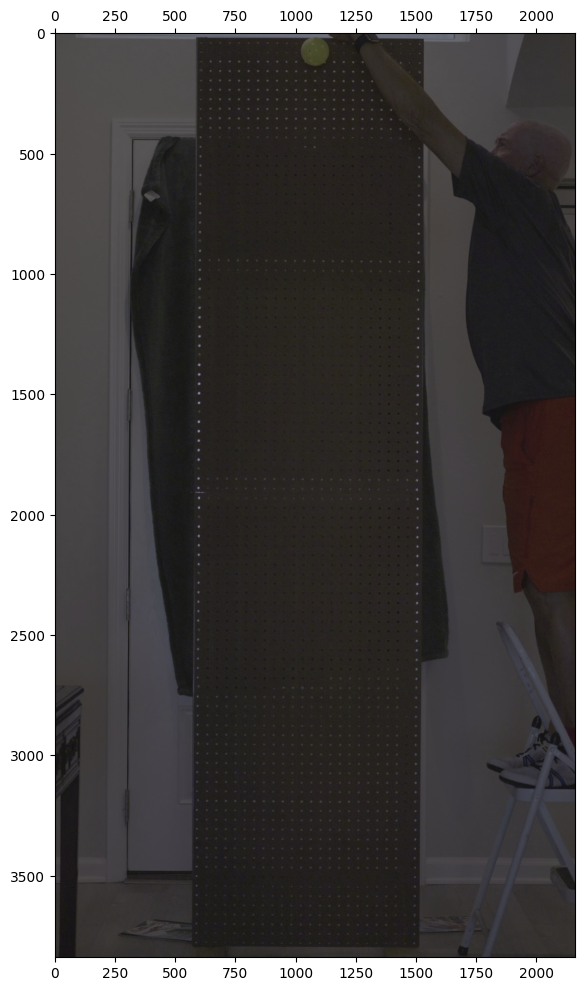

In [ ]:
n = 31
ret, top = get_frame(cap, n)
if not ret:
    print("No frame to view.")
else:
    view_frame(top)


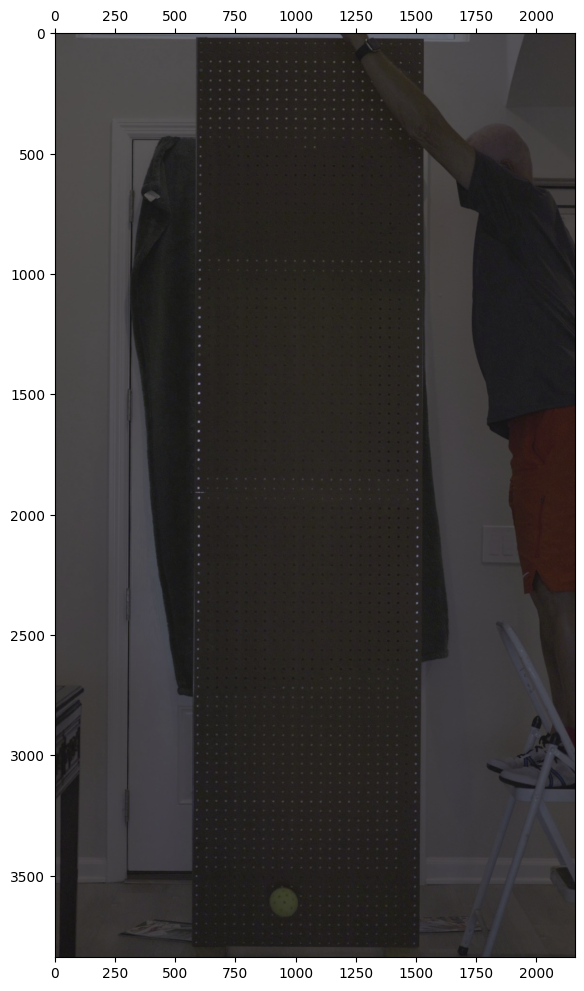

In [ ]:
n = 63
ret, bottom = get_frame(cap, n)
if not ret:
    print("No frame to view.")
else:
    view_frame(bottom)


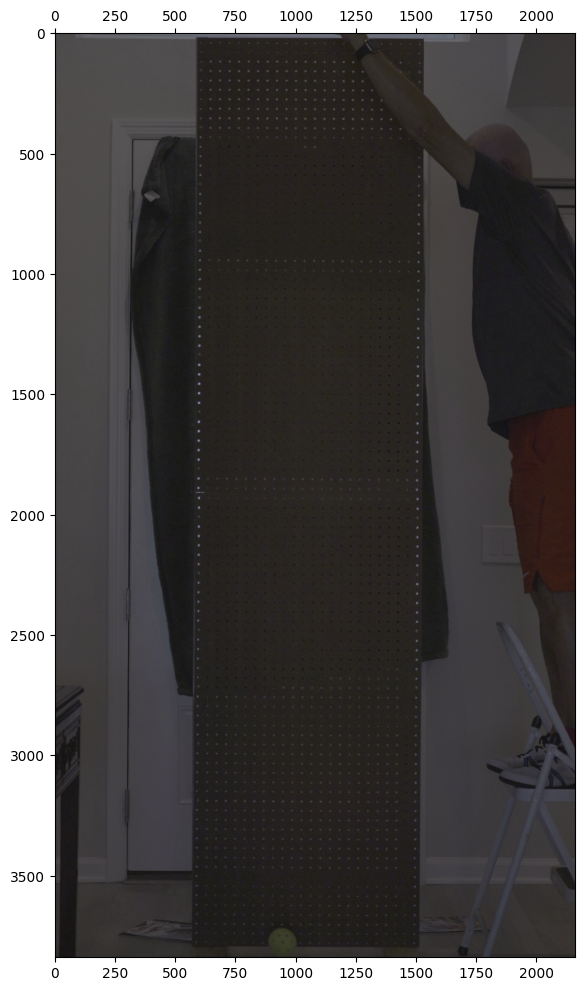

In [ ]:
n = 64
ret, frame = get_frame(cap, n)
if not ret:
    print("No frame to view.")
else:
    view_frame(frame)


I am successful in showing frame 11 (or 12?) but not frame_count - 5 Is it possible that there really are not 74 frames. I actually think
that might be the case.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right to be suspicious! The `CAP_PROP_FRAME_COUNT` property can be unreliable with some video formats, especially `.mp4` files. It often returns incorrect values.

A good way to verify the actual frame count is to loop through the video and count frames manually:

```python
cap.release()  # Release the current capture
cap = cv2.VideoCapture(freefall_path)
actual_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    actual_count += 1
print(f"Actual frame count: {actual_count}")
```

Want to try that and see what the real frame count is?

In [ ]:
cap.release()  # Release the current capture
cap = cv2.VideoCapture(freefall_path)
actual_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    actual_count += 1
print(f"Actual frame count: {actual_count}")

Actual frame count: 70


OK. So the actual frame count as calculated turned out to be 70. It looks like we need frames 11 to 63, cropping between 800 and 1200.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So you have 53 frames (from 11 to 63 inclusive) showing the ball's fall, and you want to crop horizontally to x-coordinates 800 to 1200. That's a nice narrow window focused on the pegboard and ball.

Now you need to decide: do you want to create a new cropped video file, or would you prefer to extract the cropped frames directly into a numpy array for analysis?

Which approach sounds better for your drag coefficient calculations?

That is a good question. I think that it would be useful to create a new video. That way any future analysis could be done without
any "video management".  I suppose we could do something like crop it into some sort of numpy array and release the memory of the 
original video. Before we do the cropping, perhaps we should figure out how to "calibrate". I know that the ball fell vertically.
However, it definitely is moving right to left in the images. That should be due to the camera being out of level, I think.

It is also quite possible that the pegboard is also not perfectly vertical. Can we some how correct for the camera using images
11 and 63? Then we could also investigate, after correcting for the camera, whether the pegboard background was not vertical.

Can we capture the position of the bottom of the ball in each frame. From that we can correct for the camera. We could also
measure versus the board how much it moved.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent thinking! You're absolutely right that we need to handle the camera tilt before doing physics analysis. If the camera isn't level, the apparent horizontal motion isn't real ball motion—it's just perspective.

Here's a systematic approach:

**Step 1: Find the ball position in frames 11 and 63**
If the ball is falling vertically but appears to move horizontally, that horizontal drift tells us the camera angle. We can use those two positions to calculate the tilt angle and correct all frames.

**Step 2: Apply the rotation correction**
Once we know the angle, we can rotate all frames so the ball's path becomes truly vertical.

**Step 3: Then check the pegboard**
After camera correction, if there's still drift, that would indicate the pegboard itself wasn't vertical.

For finding the ball position, what method are you thinking? Since it's a pickleball (likely yellow-green), we could:
- Use color thresholding to isolate the ball
- Use circle detection (Hough circles)
- Manual clicking on frames 11 and 63 to get a quick initial calibration

Which approach would you like to try first?

I have played with Hough a bit. I found that it took a lot of experimentation. That said, IIRC, when I did that months ago, I did it against the whole video.
That was pretty time-consuming. So I think maybe, we start with just one frame. Make a copy of the frame and crop it. Use that to determine what technique
might work best. One complication, I found color investigation was awkward because there is a significant range in the colors across the ball. The ball
also has holes. And the lighting affects the color as well. Also, although the ball is fairly round, the images of it will be less so as the speed increases.

I am going to try to optimize the lighting for very fast shutter to help with that. But I also will want a higher frame rate to get more data for regression.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great plan! Starting with a single frame to experiment with detection methods is much more efficient than processing the whole video repeatedly.

So let's work with one frame first. Which frame would you like to use for testing? Maybe pick one from the middle of the fall where the ball is moving at a moderate speed—that way it won't be too blurred but also not trivially easy.

Once you choose a frame and crop it, you can try different approaches (color thresholding, edge detection, Hough circles, etc.) and see what works best for your specific lighting and ball appearance.

Which frame number do you want to start with for your detection experiments?

I am glad you mentioned that. The first of the two frames only has the bottom of the ball. The last frame has the full ball travelling at the highest speed. I will advance from frame 11 to the first 
full ball.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Smart approach! Finding the first frame with the full ball visible will give you a clearer target for testing detection methods, and it won't have the motion blur of the high-speed frames yet.

Go ahead and advance through frames starting from 11 until you find one where the entire ball is visible. Once you've identified that frame, you can crop it and start experimenting with detection techniques.

What frame number did you land on?

Frame 31 should work

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Frame 31 it is. Now you can grab that frame and create a cropped version (say, x from 800 to 1200) to use for testing your ball detection methods.

Want to try cropping frame 31 and displaying it? The syntax for cropping in numpy is `frame[y1:y2, x1:x2]` if you need a reminder.

In [ ]:
top_cropped = top[0:200, 800:1200]

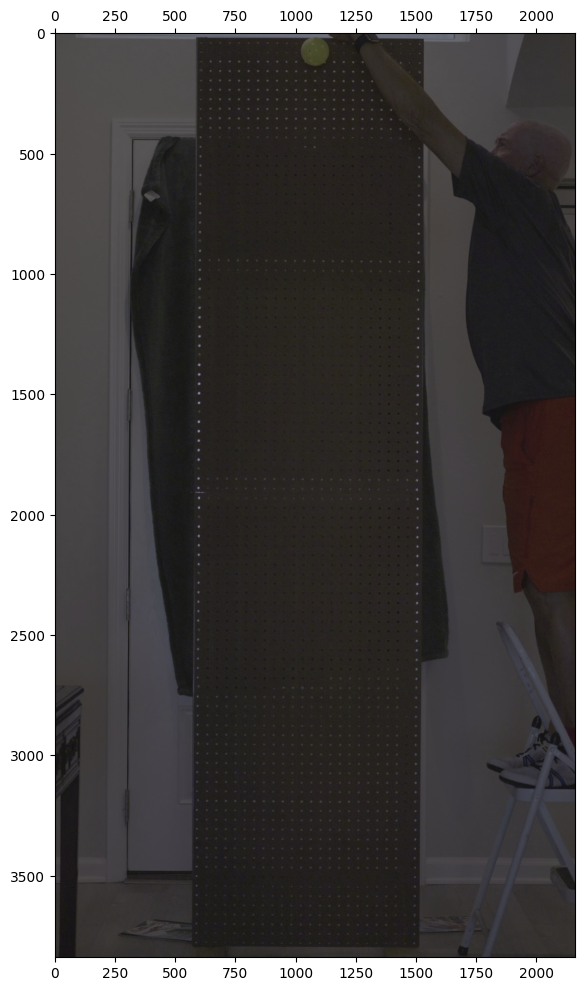

In [ ]:
view_frame(top)

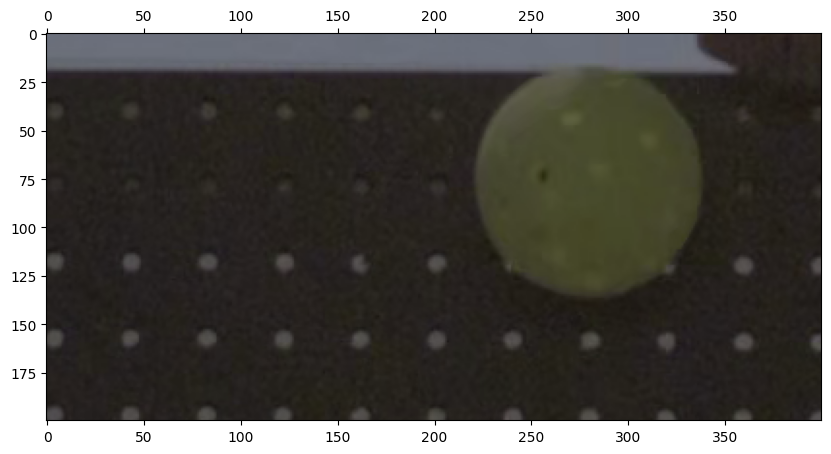

In [ ]:
view_frame(top_cropped)

In [ ]:
bottom_cropped = bottom[3500:, 800:1200]

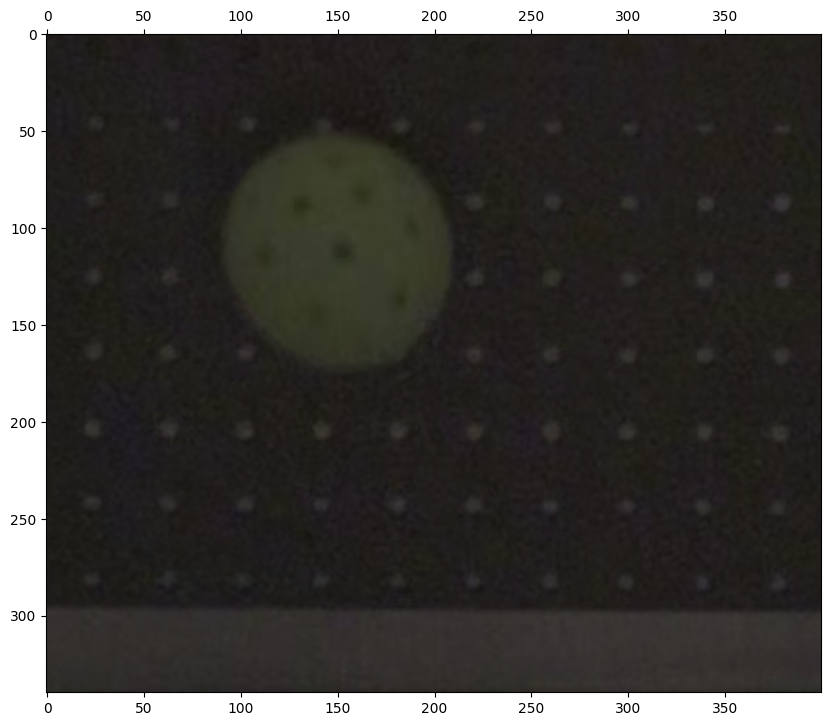

In [ ]:
view_frame(bottom_cropped)

In [ ]:
def show_frames_side_by_side(frame1, frame2, title1='Frame 1', title2='Frame 2'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
    
    ax1.imshow(frame1_rgb)
    ax1.set_title(title1)
    ax1.axis('on')
    
    ax2.imshow(frame2_rgb)
    ax2.set_title(title2)
    ax2.axis('on')
    
    plt.tight_layout()
    plt.show()

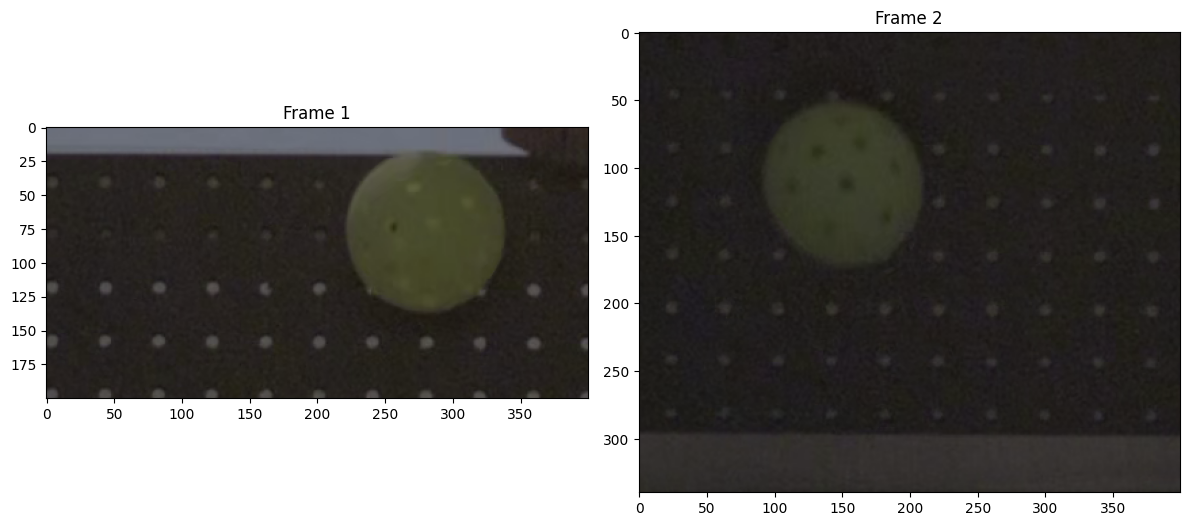

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped)

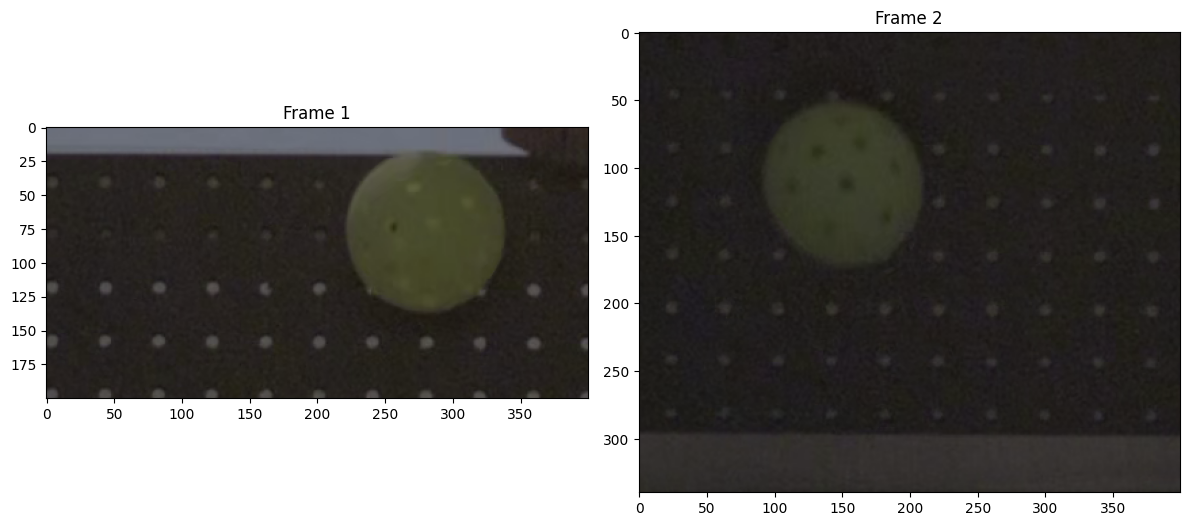

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped)

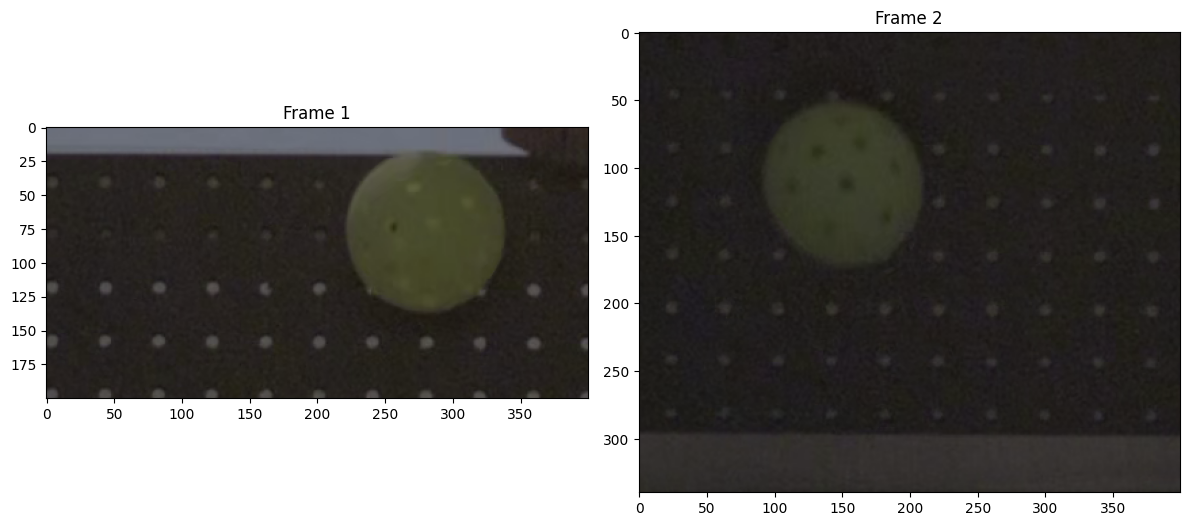

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped)

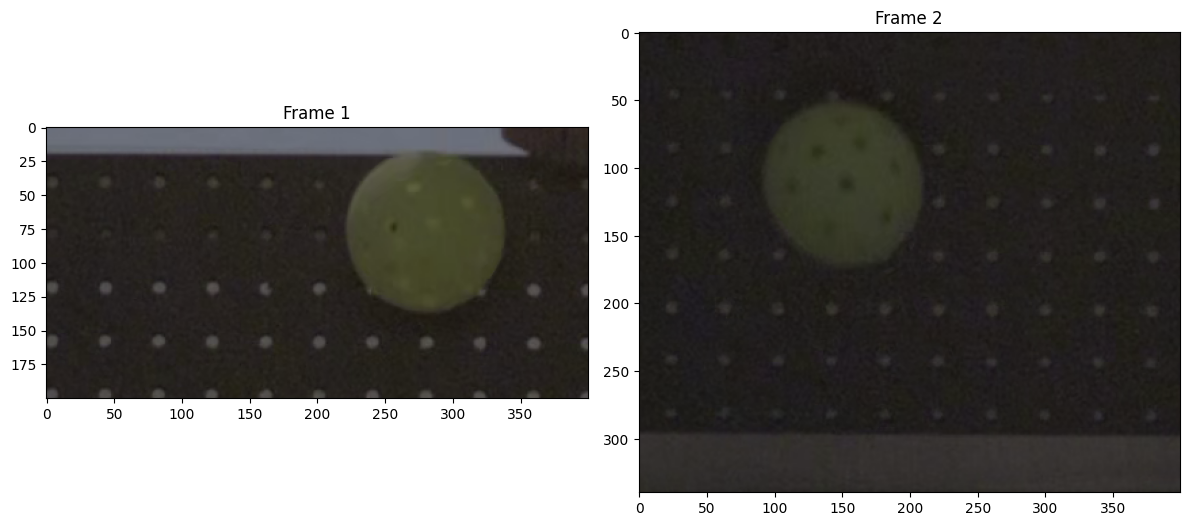

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped)

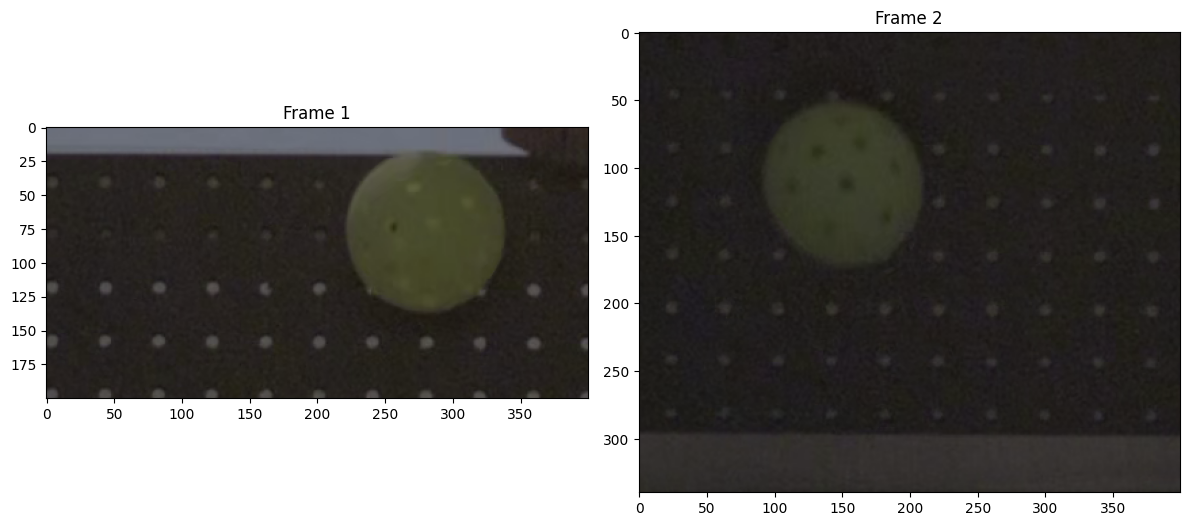

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped)

Ok. let's try some magic on them. Pick what you think might work best.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at your cropped frames, the ball has good color contrast against the dark pegboard. I'd suggest trying **color thresholding in HSV color space** first—it's often more robust to lighting variations than RGB, and your yellow-green ball should stand out well.

Here's the approach:
1. Convert to HSV
2. Create a mask for yellow-green colors
3. Apply the mask to isolate the ball

Want to try converting one of your cropped frames to HSV and experimenting with threshold values? You'll need to find the right range for the hue, saturation, and value channels that captures the ball.

Would you like to give it a shot, or would you prefer I show you a starting example?

example

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a starting example to try with one of your cropped frames:

```python
hsv = cv2.cvtColor(top_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)
```

Then display the mask to see what gets captured. You'll likely need to adjust those threshold values to get a clean isolation of the ball.

Give it a try and see what the mask looks like!

In [ ]:
hsv = cv2.cvtColor(top_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
top_mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

hsv = cv2.cvtColor(bottom_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
bottom_mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

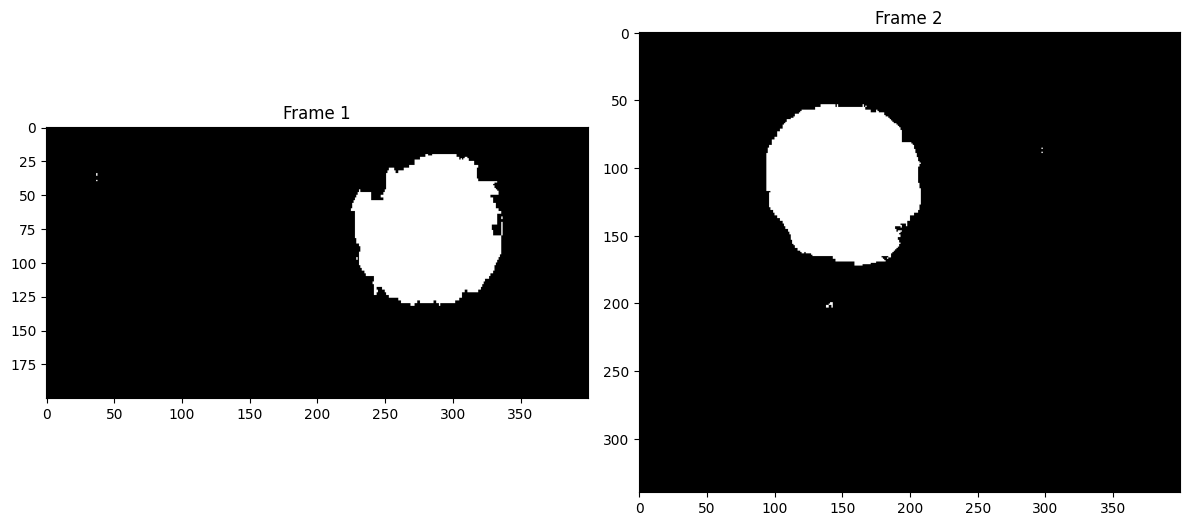

In [ ]:
show_frames_side_by_side(top_mask, bottom_mask)

Can those centroids be used to calculate a radius? Can we then combine the cetroids and the radii, and visually show the centroids and circles?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You can calculate the radius from the mask and then draw both the centroid and circle on the original frames to visualize the detection.

To find the centroid and radius, you can use `cv2.moments()` for the centroid, and for radius you could use the equivalent radius from the contour area, or find the actual contours and fit a circle.

Would you like to try writing the code to:
1. Find contours in the mask
2. Calculate centroids and radii
3. Draw them on the original frames

Or would you like me to show you an example of how to do this?

In [ ]:
top_moments = cv2.moments(top_mask)
top_cx = int(top_moments['m10'] / top_moments['m00'])
top_cy = int(top_moments['m01'] / top_moments['m00'])

bottom_moments = cv2.moments(bottom_mask)
bottom_cx = int(bottom_moments['m10'] / bottom_moments['m00'])
bottom_cy = int(bottom_moments['m01'] / bottom_moments['m00'])


In [ ]:
top_cx, top_cy, "            ", bottom_cx, bottom_cy

(282, 76, '            ', 150, 111)

i would like an example. Please make it a function, so that I can apply it to each ball.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a function that finds the centroid and radius, then draws them on the frame:

```python
def detect_and_draw_ball(frame, mask):
    # Find centroid
    moments = cv2.moments(mask)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    
    # Draw on frame
    result = frame.copy()
    cv2.circle(result, (cx, cy), radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(result, (cx, cy), 5, (255, 0, 0), -1)  # Blue centroid dot
    
    return result, cx, cy, radius
```

Try calling it with your frames and masks to see the visualization!

In [ ]:
def detect_and_draw_ball(frame, mask):
    # Find centroid
    moments = cv2.moments(mask)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    
    # Draw on frame
    result = frame.copy()
    cv2.circle(result, (cx, cy), radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(result, (cx, cy), 5, (255, 0, 0), -1)  # Blue centroid dot
    
    return result, cx, cy, radius

In [ ]:
top_result,       top_cx,    top_cy,    top_radius = detect_and_draw_ball(top_cropped,    top_mask)
bottom_result, bottom_cx, bottom_cy, bottom_radius = detect_and_draw_ball(bottom_cropped, bottom_mask)


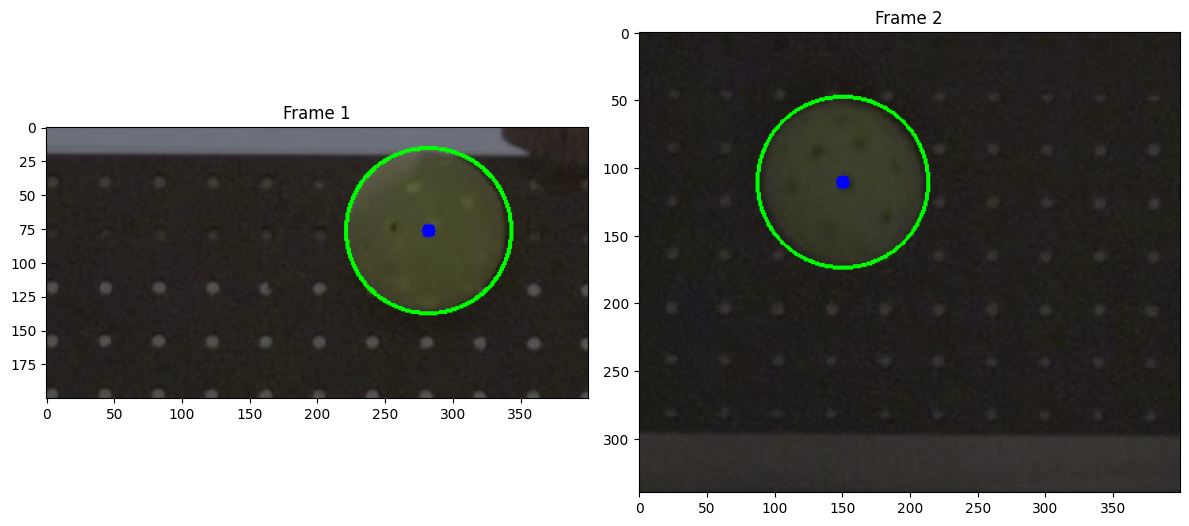

In [ ]:
show_frames_side_by_side(top_result, bottom_result)

In [ ]:
top_radius, bottom_radius

(61, 63)

That is very impressive. While we were doing this, it occured to me that maybe it makes more sense to use the tops, since they are seen at the begin of the open shutter.
For calibration purposes, though, the centroid should be fine since it is an x correction that matters.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a great observation! You're right that for physics analysis, using the top of the ball would give you the position at shutter open, which is more precise timing-wise. But for the camera tilt calibration, the centroid works perfectly since you only need the horizontal (x) displacement.

So your plan is:
1. Use centroids from frames 11 and 63 to calculate the camera tilt angle
2. Once you correct for tilt, switch to tracking the top of the ball for the actual drag coefficient analysis

Does that sound right? And are you ready to calculate the tilt angle from the two centroid positions you have?

You are right with me on that. I just rethought it slightly though. We need x,y to calculate angle. We can get the x offset here. But we need to know far the ball 
dropped between the two frames. So I think we should apply the algorithm to the original two frames. (or a horizontal cropping only)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent point! You need both the x and y displacements between the two frames to calculate the tilt angle correctly. If you crop vertically, you lose the y-coordinate information you need.

So you want to:
1. Apply the detection to the full-height frames (with only horizontal cropping from 800 to 1200)
2. Get (x, y) positions for both frames
3. Calculate the angle from the displacement vector

Should you go ahead and create horizontally-cropped versions of frames 11 and 63, then run the detection on those?

How do I eliminate the vertical cropping? top_cropped = top[0:200, 800:1200]

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To eliminate the vertical cropping, just use `:` for the y-dimension instead of `0:200`:

```python
top_cropped = top[:, 800:1200]
```

This keeps all rows (full height) while still cropping horizontally from 800 to 1200.

In [ ]:
top_cropped_full = top[:, 800:1200]
bottom_cropped_full = bottom[:, 800:1200]

Hmm. I thought that would work.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

What happened when you tried it? Did you get an error, or did the detection not work as expected?

If you're trying to run the detection on the full-height cropped frames, remember you'll need to create new masks for them since the HSV thresholding needs to be applied to these new cropped frames.

What issue are you seeing?

In [ ]:

top_full,       top_cx,    top_cy,    top_radius = detect_and_draw_ball(top_cropped_full,    top_mask)
bottom_full, bottom_cx, bottom_cy, bottom_radius = detect_and_draw_ball(bottom_cropped_full, bottom_mask)

I needed to redo the masks. Yes. Please put in the code to do that.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
hsv_top = cv2.cvtColor(top_cropped_full, cv2.COLOR_BGR2HSV)
top_mask_full = cv2.inRange(hsv_top, lower_yellow_green, upper_yellow_green)

hsv_bottom = cv2.cvtColor(bottom_cropped_full, cv2.COLOR_BGR2HSV)
bottom_mask_full = cv2.inRange(hsv_bottom, lower_yellow_green, upper_yellow_green)
```

In [ ]:
top_cropped_full    = top   [:, 800:1200]
bottom_cropped_full = bottom[:, 800:1200]

In [ ]:
hsv_top = cv2.cvtColor(top_cropped_full, cv2.COLOR_BGR2HSV)
top_mask_full = cv2.inRange(hsv_top, lower_yellow_green, upper_yellow_green)

hsv_bottom = cv2.cvtColor(bottom_cropped_full, cv2.COLOR_BGR2HSV)
bottom_mask_full = cv2.inRange(hsv_bottom, lower_yellow_green, upper_yellow_green)

In [ ]:

top_full,       top_cx,    top_cy,    top_radius = detect_and_draw_ball(top_cropped_full,    top_mask_full)
bottom_full, bottom_cx, bottom_cy, bottom_radius = detect_and_draw_ball(bottom_cropped_full, bottom_mask_full)

I am rushing too much.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

No worries! It's easy to get excited when things are working. Take your time—you're making great progress.

Do you want to visualize the results to see if the detection worked well on the full-height frames?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Try displaying them side by side:

```python
show_frames_side_by_side(top_full, bottom_full)
```

This will show you the detected circles and centroids on both frames.

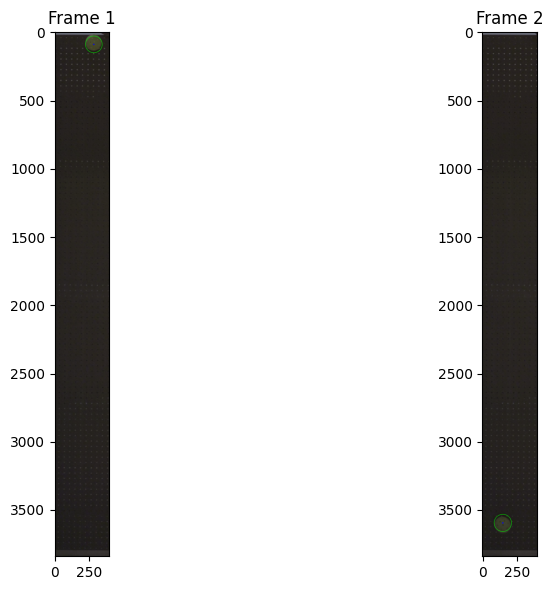

In [ ]:
show_frames_side_by_side(top_full, bottom_full)

In [ ]:
top_cx,    top_cy,    top_radius, bottom_cx, bottom_cy, bottom_radius

(282, 90, 61, 151, 3597, 63)

moved left 131 over 3507

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So you have:
- Horizontal displacement: 131 pixels to the left
- Vertical displacement: 3507 pixels down

Now you can calculate the camera tilt angle using:
```
angle = arctan(131 / 3507)
```

This will give you the angle in radians (or use `np.degrees()` to convert to degrees). This is the angle you'll need to rotate all frames to correct for the camera tilt.

Want to calculate that angle?

In [ ]:
angle = np.arctan(131 / 3507)
np.degrees(angle)

np.float64(2.139224147431737)

?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The function is called `atan`, not `arctan` in Python's math module:

```python
from math import atan
angle = atan(131 / 3507)
```

Or you can use `np.arctan()` since you already have numpy imported.

ok. I will be back. the next trick is to see what the angle of the pegboard is.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Sounds good! When you come back, you can measure the pegboard angle by tracking the pegs themselves—maybe pick two pegs that are vertically aligned and measure their positions in the corrected (rotated) frames to see if there's any residual tilt.

See you when you return!